In [7]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

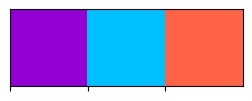

In [8]:
# Custom color palette
custom_palette = ['#9400D3', '#00BFFF', '#FF6347']

# Plot color palettes
sns.palplot(custom_palette)

# Data Exploration

In [ ]:
data = pd.read_csv("A:\\Projects\\Stellar_Classification_Capstone\\data\\raw\\star_classification.csv")
data.head()

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

There is no null value, and all features except class are numeric.

In [ ]:
print(data.duplicated().sum())

0


In [ ]:
data.shape

(100000, 18)

In [ ]:
# Display summary statistics for numerical features
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
data.nunique().sort_values()

,0
rerun_ID,1
class,3
cam_col,6
run_ID,430
field_ID,856
fiber_ID,1000
MJD,2180
plate,6284
obj_ID,78053
r,91901




* `obj_ID` and has 78053 unique values and seems like an identifier.
* `spec_obj_ID` with 100,000 unique values is a clear indicator that it is a unique identifier for each observation. Unique identifiers like `spec_obj_ID` typically do not contribute any meaningful predictive information for a machine learning model.
* `rerun_ID` column has only one unique value, it means it does not provide any useful information for the model. So we can drop it.






We can drop these features:

* `run_ID`: The ID representing a
specific imaging run in the SDSS.
* `cam_col`: Indicates the column in the camera where the data was collected.
* `field_ID`: The field number associated with the observation.
*  `fiber_ID`: Identifies the fiber used in a spectroscopic observation.
* `plate`: An identifier for the plate used in the spectrograph. Each plate observes a specific region of the sky.
* `MJD` (Modified Julian Date): The date on which the observation was made, useful for tracking when specific data was collected.













These are logistic features primarily only used for tracking specific observations (metadata) that are not essential for the classification of celestial objects.

We will also be dropping:

**Right ascension(α) and declination(δ):** These are the celestial coordinates that specify an object's position in the sky, analogous to longitude and latitude on Earth. These values indicate spatial location but do not contribute to the classification of astronomical objects. Therefore, they can be excluded from the classification analysis.

In [ ]:
data = data.drop(columns=['alpha', 'delta', 'obj_ID', 'spec_obj_ID','rerun_ID', 'run_ID', 'cam_col', 'field_ID', 'fiber_ID', 'plate', 'MJD'])

The remaining features are as follows:

`u`, `g`, `r`, `i`, `z`: These are photometric measurements from the five SDSS filters, capturing the brightness of celestial objects at different wavelengths. They are essential for classification, as they provide direct information about an object's light profile across the spectrum.

`redshift`: This feature quantifies the stretching of light due to the universe's expansion. It is particularly valuable for distinguishing galaxies and quasars, which typically exhibit higher redshift values than stars.

In [ ]:
data['class'].value_counts()

,count
class,
GALAXY,59445
STAR,21594
QSO,18961


# Visual Summary

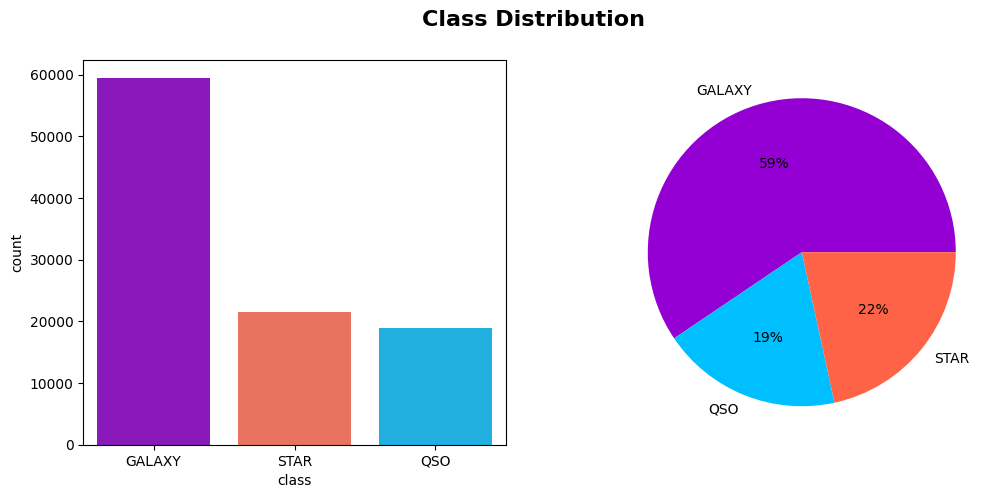

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Countplot
sns.countplot(data = data, x = data['class'],
              order = data['class'].value_counts().index,
              hue = 'class',
              ax = axes[0],
              palette = custom_palette,
              legend = False)

# Pie Chart
data.groupby('class').size().plot(kind='pie', colors = custom_palette, ax = axes[1], autopct='%.0f%%')

plt.suptitle('Class Distribution',
             fontweight = 'heavy', fontsize = 16);

* The `redshift` feature provides excellent separation, with stars clustered near zero and quasars exhibiting much higher values.
* Quasars (`QSO`) form a distinct cluster in `u` vs `g`, making them easier to identify compared to stars and galaxies.
* Photometric features (`u`, `g`, `r`, `i`, `z`) show overlap between stars and galaxies, suggesting these two classes may be harder to distinguish using only individual magnitudes.
* No significant data quality issues are present after cleaning, with smooth distributions and few outliers, supporting reliable training and validation across diverse algorithms.

* * *

Apparent class imbalance.

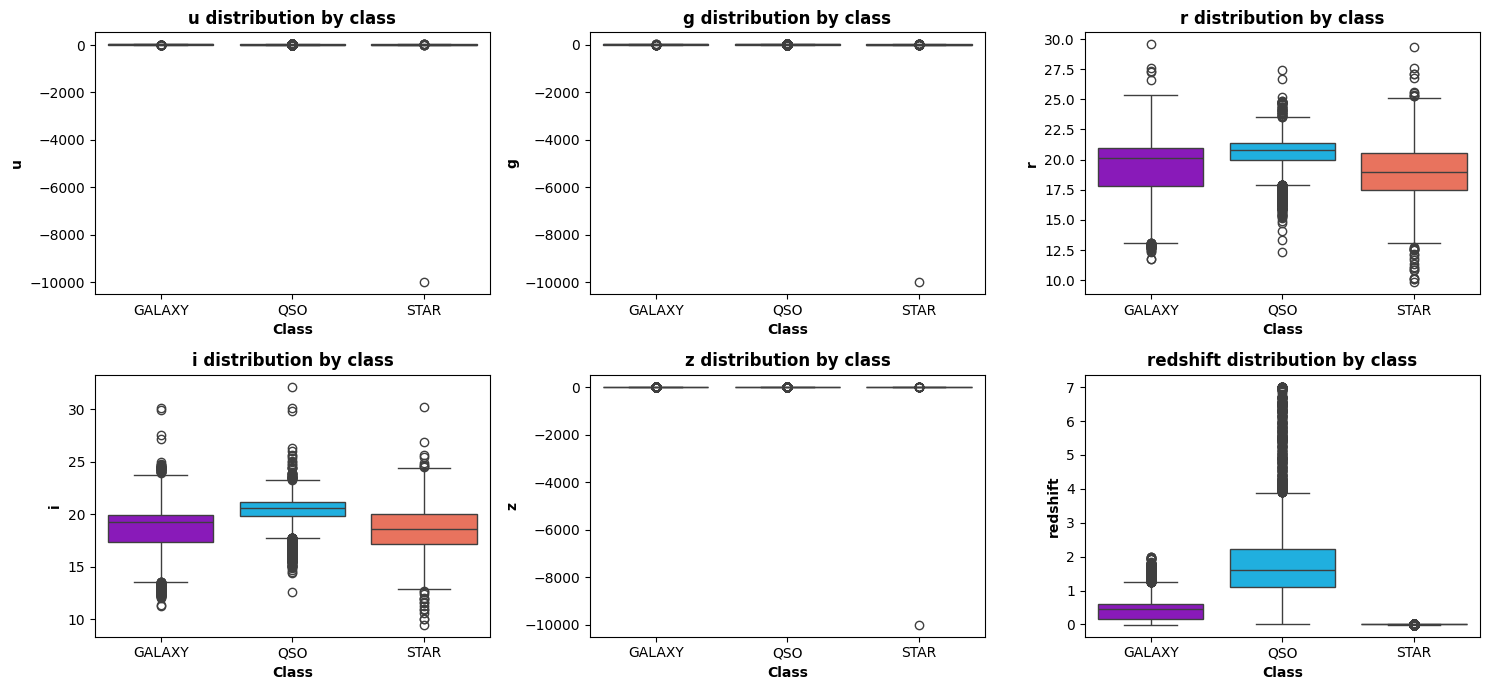

In [ ]:
# Boxplots
features = ['u', 'g', 'r', 'i', 'z', 'redshift']

# Creates a figure with 2 columns and 3 rows (for 6 features)
fig, axes = plt.subplots(2, 3, figsize=(15,7))
axes = axes.flatten() # Flattens the 2D array of axes into 1D for easy iteration

for i, feature in enumerate(features):
  sns.boxplot(x='class', y=feature, data=data, palette=custom_palette, hue='class', legend=False, ax=axes[i])
  axes[i].set_xlabel('Class', fontweight = 'heavy')
  axes[i].set_ylabel(feature, fontweight = 'heavy')
  axes[i].set_title(f'{feature} distribution by class',fontweight = 'heavy', fontsize = 12)

plt.tight_layout()
plt.show()

The boxplots indicate that the features `u`, `g`, and `z` each contain a single outlier associated with the `STAR` class. The next step is to identify the specific locations of these outliers within the dataset.

In [ ]:
display(data[data['u'] == min(data['u'])][features + ['class']])
display(data[data['g'] == min(data['g'])][features + ['class']])
display(data[data['z'] == min(data['z'])][features + ['class']])

,u,g,r,i,z,redshift,class
79543,-9999.0,-9999.0,18.1656,18.01675,-9999.0,0.000089,STAR


,u,g,r,i,z,redshift,class
79543,-9999.0,-9999.0,18.1656,18.01675,-9999.0,0.000089,STAR


,u,g,r,i,z,redshift,class
79543,-9999.0,-9999.0,18.1656,18.01675,-9999.0,0.000089,STAR


A magnitude value of `-9999.0` is not physically meaningful for a `STAR` or any other object.

Such entries indicate invalid or missing data and should be removed from the dataset.

In [ ]:
data = data.drop(index=[79543])
print("The shape of the dataset: {}".format(data.shape))

The shape of the dataset: (99999, 7)


Let's revisit those boxplots:

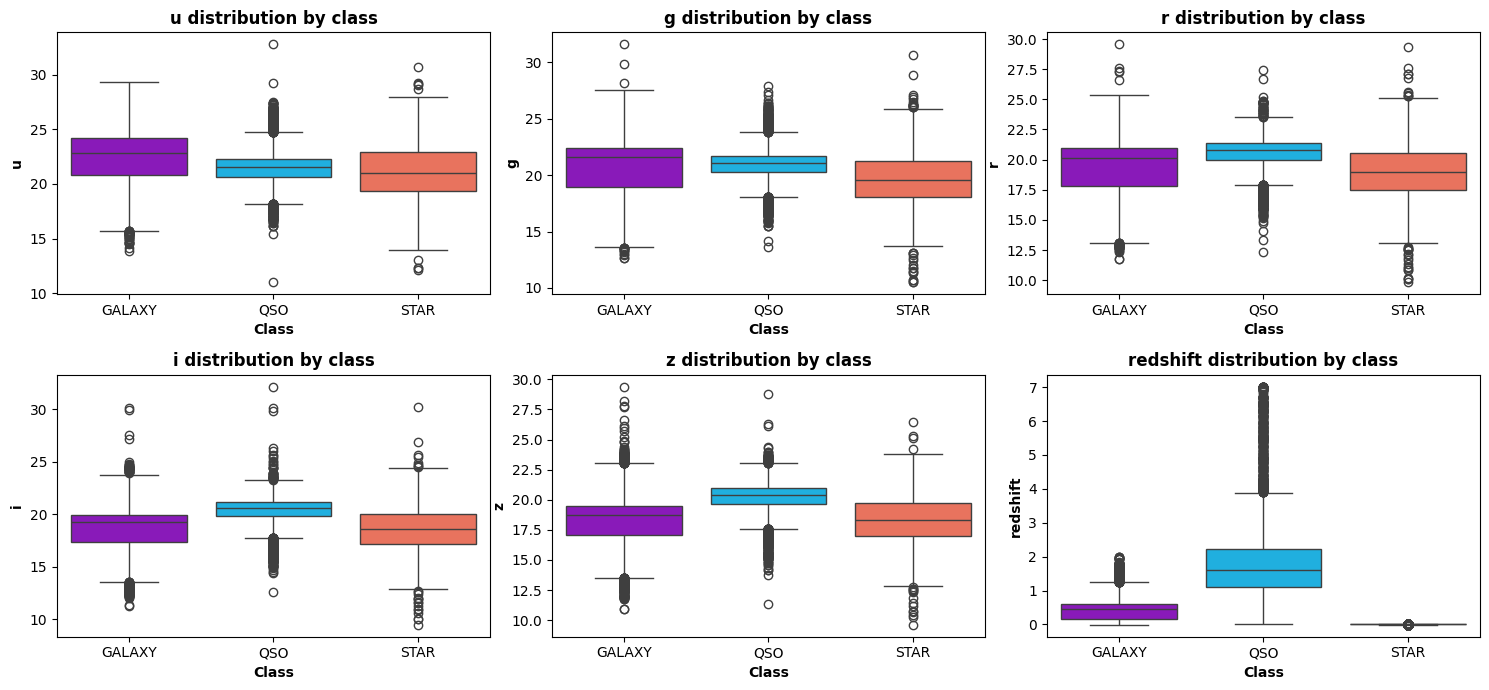

In [ ]:
features = ['u', 'g', 'r', 'i', 'z', 'redshift']

# Creates a figure with 2 columns and 3 rows (for 6 features)
fig, axes = plt.subplots(2, 3, figsize=(15,7))
axes = axes.flatten() # Flattens the 2D array of axes into 1D for easy iteration

for i, feature in enumerate(features):
  sns.boxplot(x='class', y=feature, data=data, palette=custom_palette, hue='class', legend=False, ax=axes[i])
  axes[i].set_xlabel('Class', fontweight = 'heavy')
  axes[i].set_ylabel(feature, fontweight = 'heavy')
  axes[i].set_title(f'{feature} distribution by class',fontweight = 'heavy', fontsize = 12)

plt.tight_layout()
plt.show()

*   With the removal of the extreme outlier, the boxplots now provide a clearer representation of the value ranges for each class.
*   `redshift` values for the `STAR` class are concentrated near zero
*   Some `QSO` exhibit notably high `redshift` values.





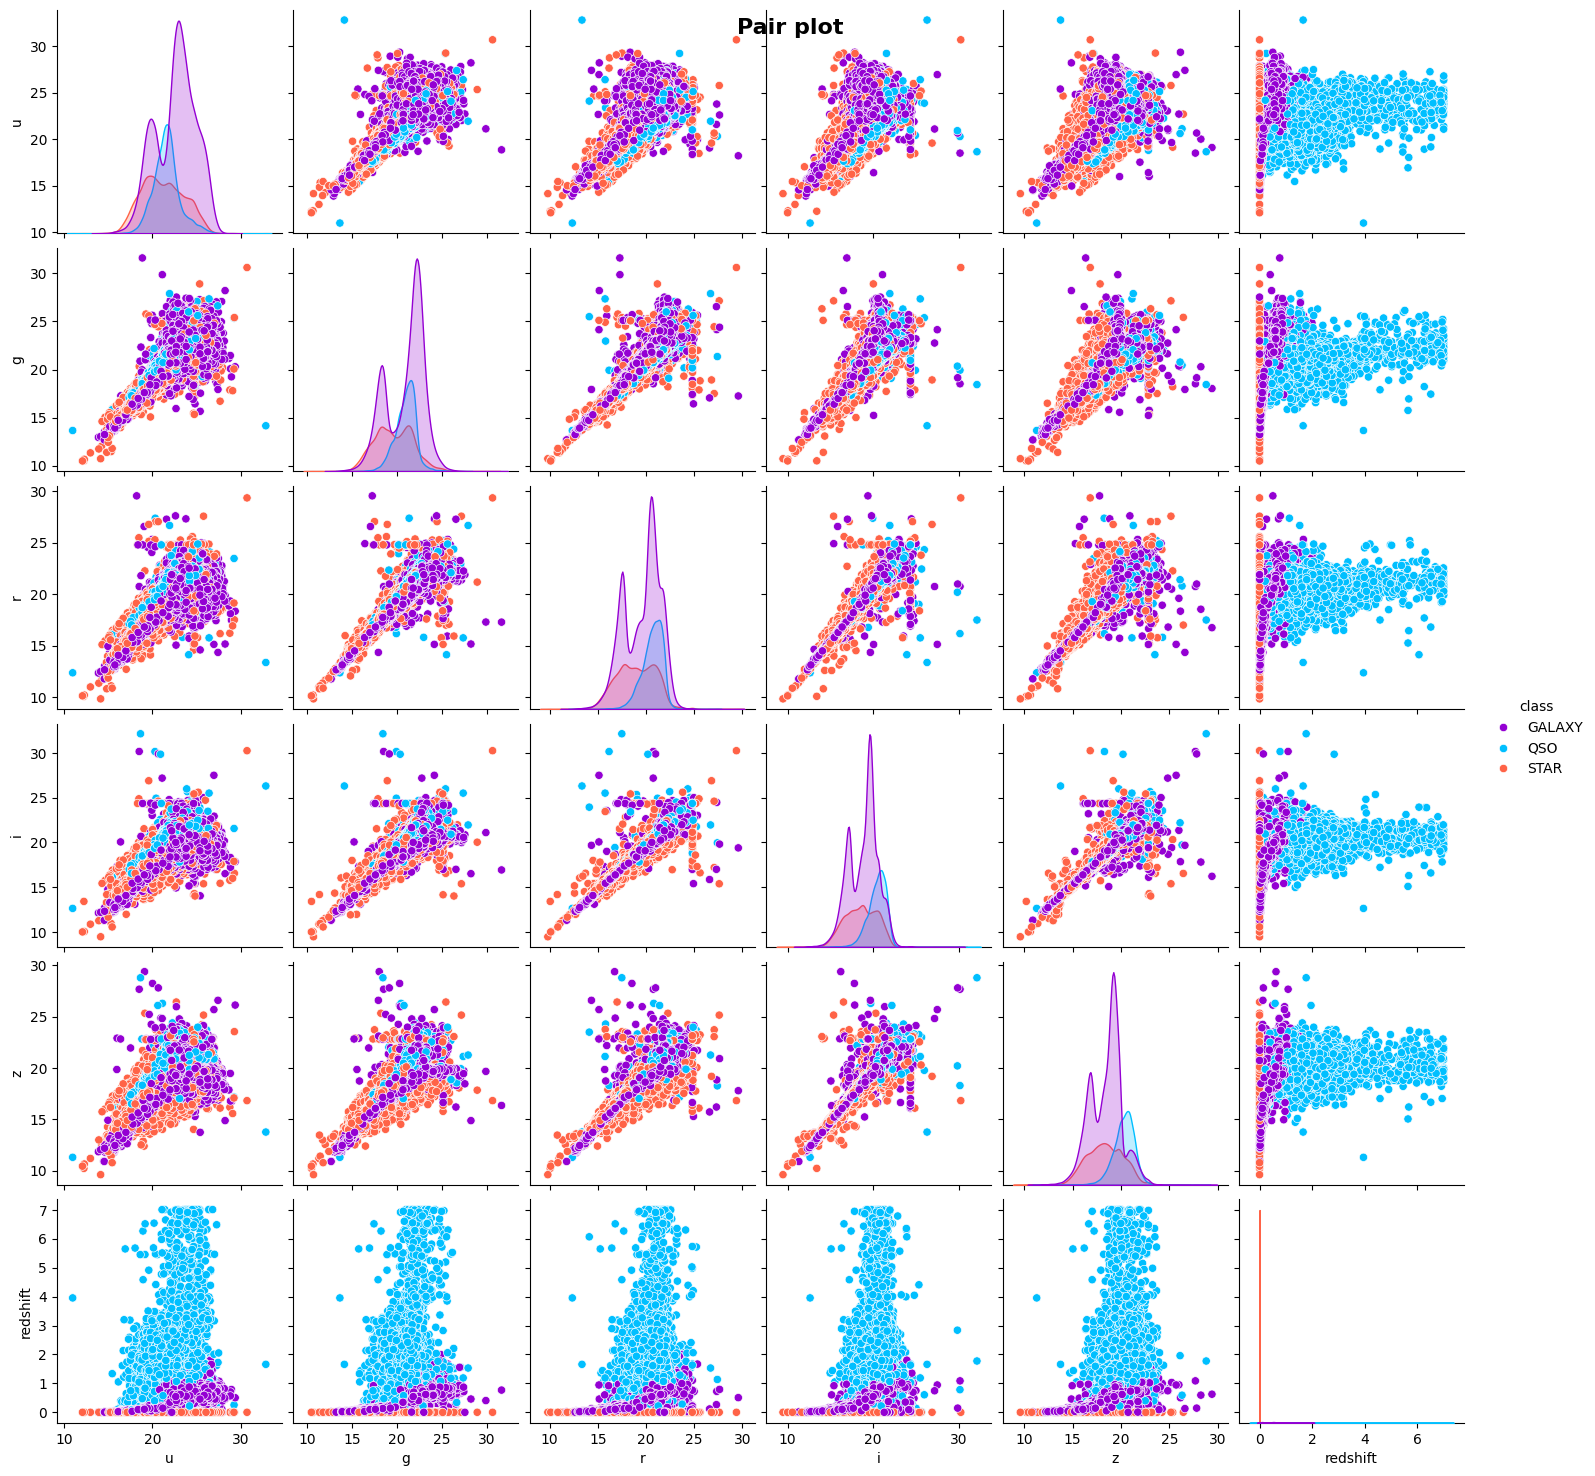

In [ ]:
# Pairplot
sns.pairplot(data = data,
             hue = 'class',
             palette = custom_palette,
             diag_kind='kde',
             height=2.5)

plt.suptitle('Pair plot',
             fontweight = 'heavy', fontsize = 16)
plt.show()

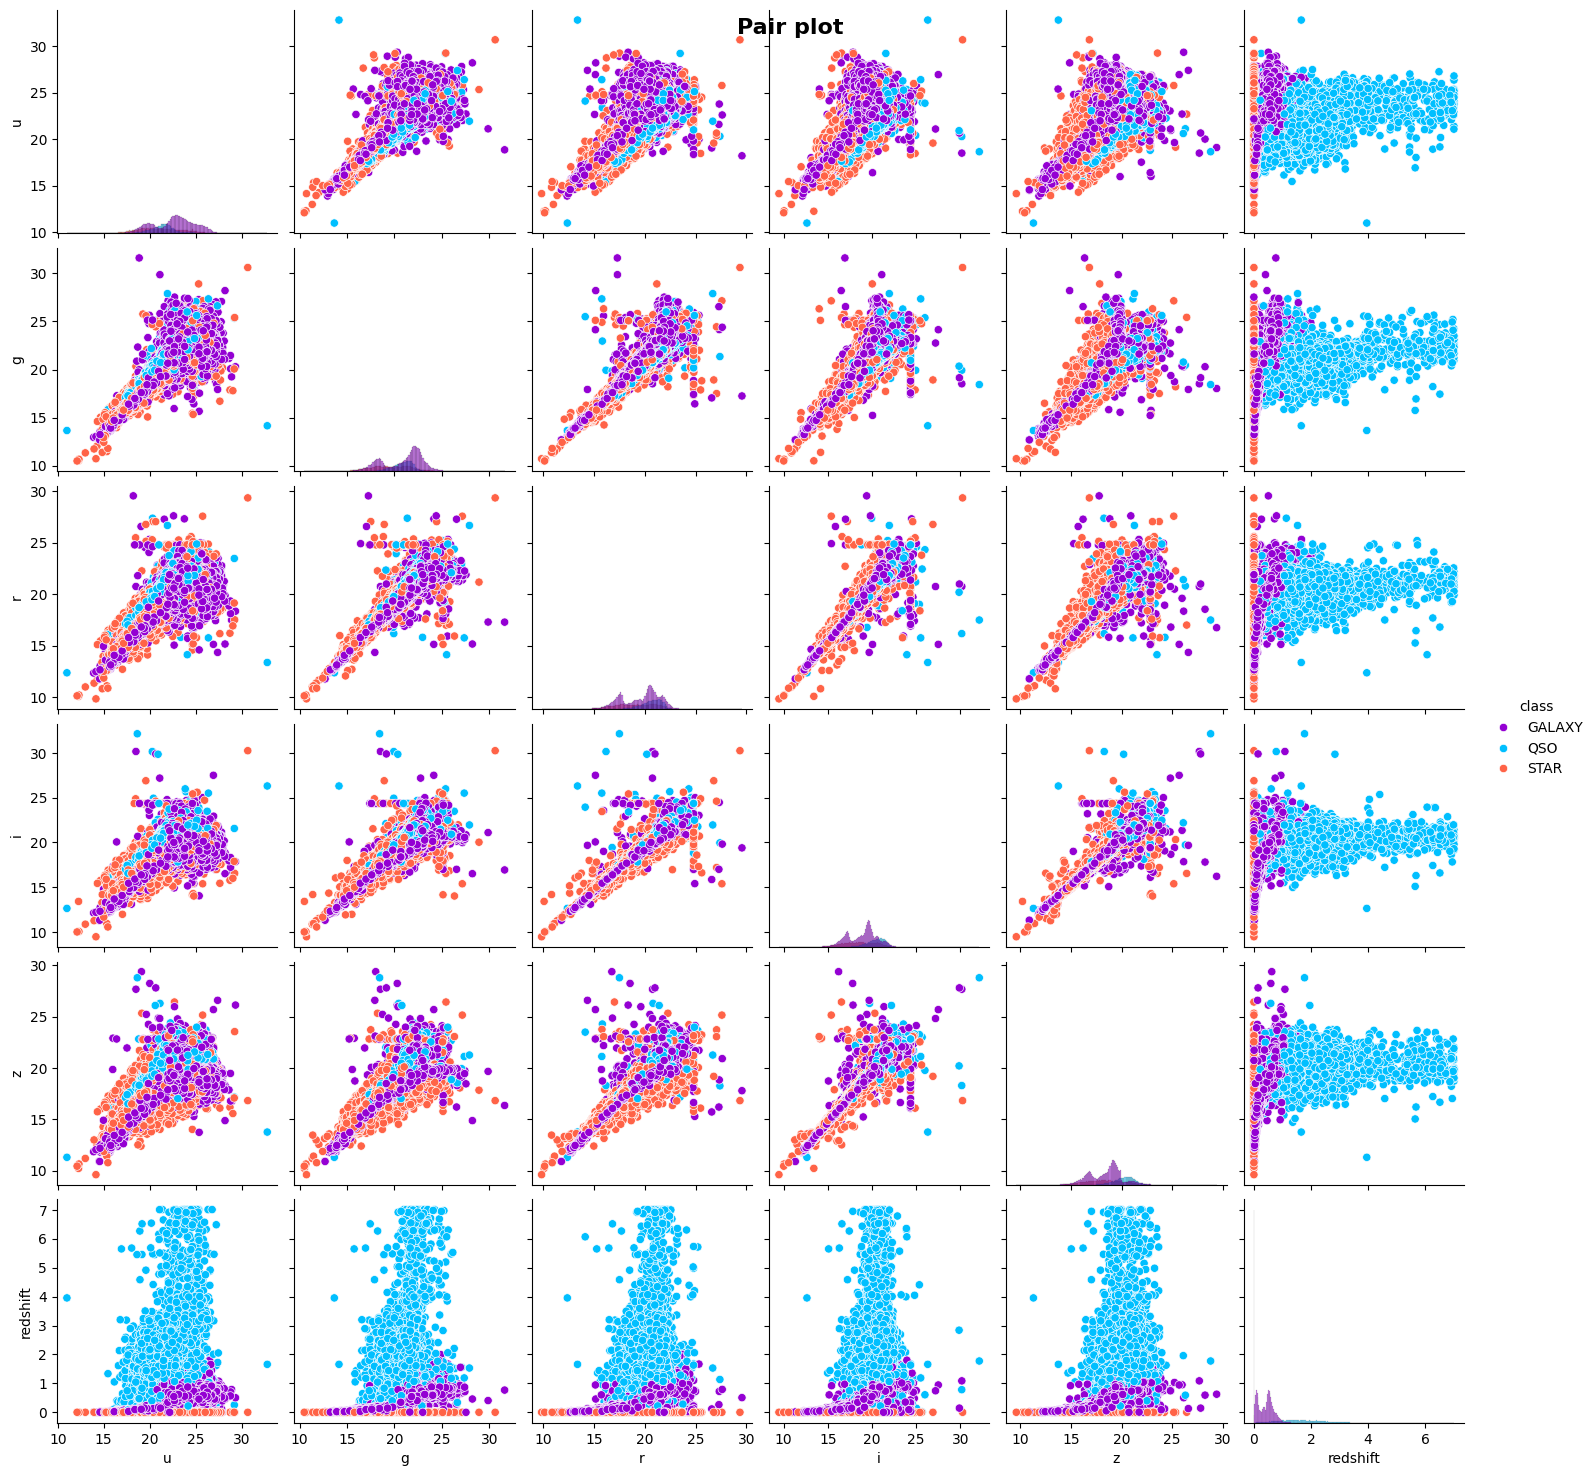

In [ ]:
# Pairplot
sns.pairplot(data = data,
             hue = 'class',
             palette = custom_palette,
             diag_kind='hist',
             height=2.5)

plt.suptitle('Pair plot',
             fontweight = 'heavy', fontsize = 16)
plt.show()

*   The `redshift` feature provides excellent separation, with stars clustered near zero and quasars exhibiting much higher values.

*   Quasars (`QSO`) form a distinct cluster in `u` vs `g`, making them easier to identify compared to stars and galaxies.
*   Photometric features (`u`, `g`, `r`, `i`, `z`) show overlap between stars and galaxies, suggesting these two classes may be harder to distinguish using only individual magnitudes.
*   Incorporating color indices(`u-g`, `g-r`, `r-i`, `i-z`)—combinations of these magnitudes—captures key differences in spectral energy distributions and is essential for effectively distinguishing stars, galaxies, and quasars.


---





Now, let's plot the correlation heatmap to examine all the remaining numerical features.


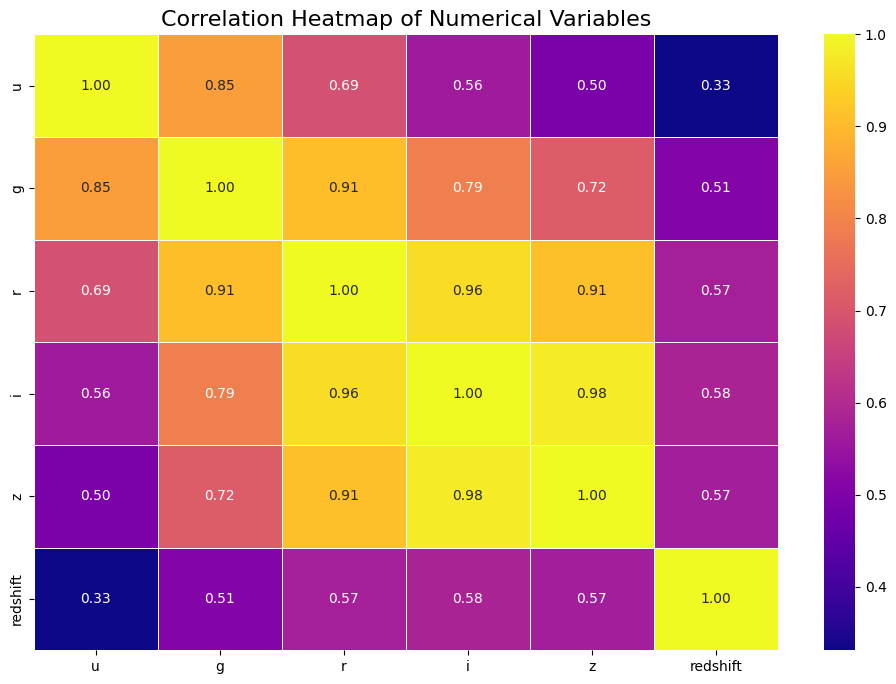

In [ ]:
numerical_columns = data.select_dtypes(exclude=['object']).columns

# Calculate the correlation matrix
corr_matrix = data[numerical_columns].corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="plasma", cbar=True, linewidth=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

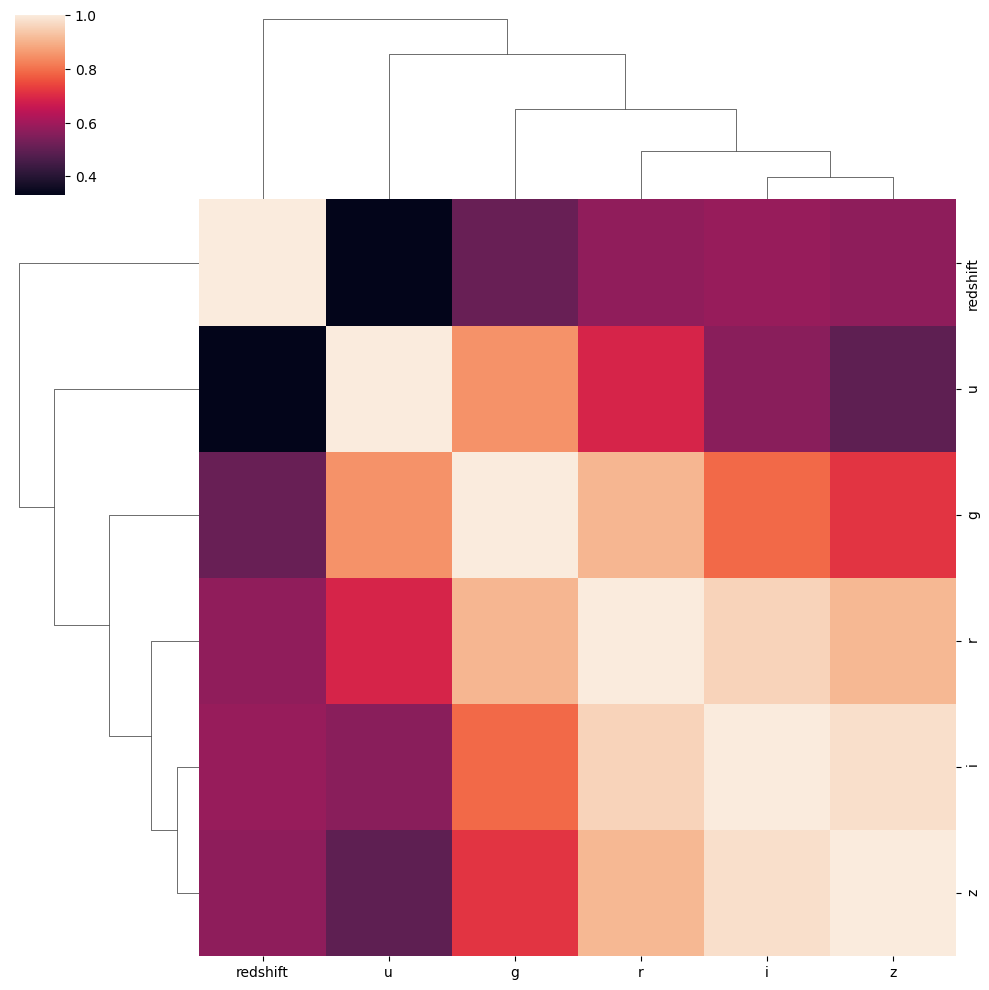

In [ ]:
sns.clustermap(corr_matrix)

*   The photometric features (`u`, `g`, `r`, `i`, `z`) show very high mutual correlations, especially among the redder bands (`r`, `i`, `z`), indicating redundancy that could affect certain models; using color indices or dimensionality reduction can help mitigate this.
*   `redshift` provides unique and informative separation between stars, galaxies, and quasars, making it a valuable feature for classification, but its moderate correlation with photometric bands means it can be used alongside them without causing excessive redundancy.
*   No significant data quality issues are present after cleaning, with smooth distributions and few outliers, supporting reliable training and validation across diverse algorithms.
*   Given the overlapping distributions among stars and galaxies in raw magnitudes, engineered features—particularly color indices derived from combinations of `u`, `g`, `r`, `i`, `z`—are essential for improving class separation and model performance.


---



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99999 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   u         99999 non-null  float64
 1   g         99999 non-null  float64
 2   r         99999 non-null  float64
 3   i         99999 non-null  float64
 4   z         99999 non-null  float64
 5   class     99999 non-null  object 
 6   redshift  99999 non-null  float64
dtypes: float64(6), object(1)
memory usage: 6.1+ MB
